## Используемые библиотеки

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import math
from math import cos, sin, radians, sqrt, asin, acos, atan, degrees
import sympy

## Исходные данные

In [164]:
f = 0
phi_min = 0
phi_max = 91
phi = np.arange(phi_min, phi_max, 1)
phi0 = 146.297
x0 = 0
y0 = 0
loa = 0.067
lab = 0.209
loc = 0.1
lbc = 0.13
xc = 0.1
yc = 0
# Для вычисления производной
delta = 0.001

## Нахождение координат

## Нахождение &phi;1

In [165]:
def phi1(angle):
    
    global phi0
    global phi
    
    temp = angle
    angle = math.floor(angle)
    delta = temp - angle
    
    
    phi_1 = phi0 + phi[angle] + delta
    
    return phi_1

### Координаты точки A

In [166]:
def xa(angle):
 
    x_a = loa * cos(radians(phi1(angle)))
        
    return x_a

def ya(angle):
    
    y_a = loa * sin(radians(phi1(angle)))
        
    return y_a


### Нахождение углф &phi;3

phi3 =  74.99882811547965


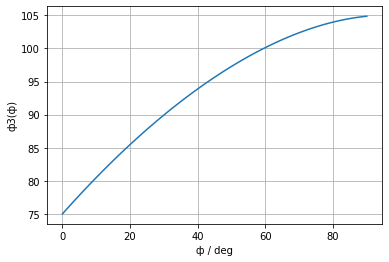

In [193]:
def phi3(angle):
    
    global loa, loc, lbc, lab
    
    lac = sqrt(loa ** 2 + loc ** 2 - 2 * loa * loc * cos(radians(phi1(angle))))
    alpha = degrees(asin(loa * sin(radians(phi1(angle))) / lac))
    beta = degrees(acos((lac ** 2 + lbc ** 2 - lab ** 2) / (2 * lac * lbc)))
    phi_3 = 180 - alpha - beta
        
    return(phi_3)

print('phi3 = ', phi3(f))

plt.plot(phi, [phi3(i) for i in phi])
plt.grid()
plt.xlabel("ф / deg")
plt.ylabel("ф3(ф)")
plt.show()



###  Координаты точки B

In [168]:
def xb(angle):
    
    global loc, lbc
    
    x_b = loc + lbc * cos(radians(phi3(angle)))
        
    return x_b

def yb(angle):
    
    global lbc
    
    y_b = lbc * sin(radians(phi3(angle)))
    
    return y_b

### Нахождение угла &phi;2

phi2 =  25.019650045002944


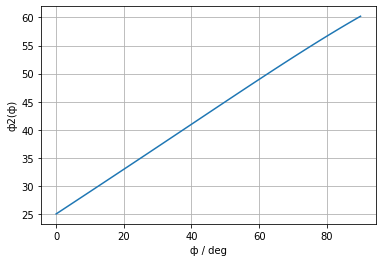

In [194]:
def phi2(angle):
    
    cathetus1 = yb(angle) - ya(angle)
    cathetus2 = xb(angle) - xa(angle)
    phi_2 = degrees(atan(cathetus1 / cathetus2))
    
    return phi_2

print('phi2 = ', phi2(f))

plt.plot(phi, [phi2(i) for i in phi])
plt.grid()
plt.xlabel("ф / deg")
plt.ylabel("ф2(ф)")
plt.show()

### Координаты точки S2

In [177]:
def xs2(angle):
    
    global lab
    
    x_s2 = (xa(angle) + xb(angle)) / 2

    return x_s2

def ys2(angle):
    
    y_s2 = (ya(angle) + yb(angle)) / 2

    return y_s2

## Построение механизма

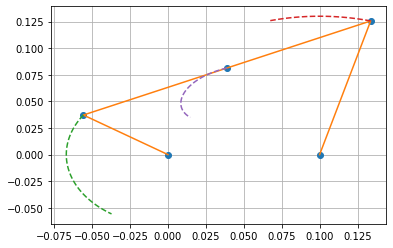

In [178]:
xf = [x0, xa(f), xb(f), xs2(f), xc]
yf = [y0, ya(f), yb(f), ys2(f), yc]
xfline = [x0, xa(f), xb(f), xc]
yfline = [y0, ya(f), yb(f), yc]
xa_trajectory = [xa(i) for i in phi]
ya_trajectory = [ya(i) for i in phi]
xb_trajectory = [xb(i) for i in phi]
yb_trajectory = [yb(i) for i in phi]
xs2_trajectory = [xs2(i) for i in phi]
ys2_trajectory = [ys2(i) for i in phi]
plt.plot(xf, yf, 'o', xfline, yfline, '-', xa_trajectory, ya_trajectory, '--', xb_trajectory, yb_trajectory, '--', 
         xs2_trajectory, ys2_trajectory, '--')
plt.grid()
plt.show()

## Кинематические передаточные функции скорости (аналоги скоростей)

### Нахождение угловых аналоговых скоростей

wq2(f) =  0.3965050468082154
wq3(f) =  0.5751796194459757


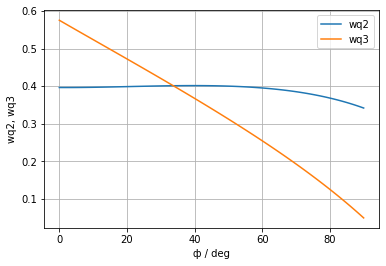

In [191]:
#Нахождение  wq2
def wq2(angle):
    
    global delta
    
    w_q2 = (phi2(angle + delta) - phi2(angle)) / delta
    
    return w_q2

print('wq2(f) = ', wq2(f))

# Нахождение wq3
def wq3(angle):
    
    global delta
    
    w_q3 = (phi3(angle + delta) - phi3(angle)) / delta
    
    return w_q3

print('wq3(f) = ',wq3(f))

plt.plot(phi, [wq2(i) for i in phi], label='wq2')
plt.plot(phi, [wq3(i) for i in phi], label='wq3')
plt.grid()
plt.ylabel('wq2, wq3')
plt.xlabel('ф / deg')
plt.legend(loc='best')
plt.show()

### Нахождение линейных аналоговых скоростей

Vqs2x(f) =  -0.05470111022795948
Vqs2y(f) =  -0.018192711091113267


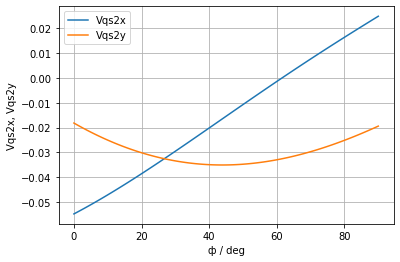

In [186]:
# Нахождение Vqs2x
def Vqs2x(angle):
    
    global delta
    
    V_qs2x = (xs2(angle + delta) - xs2(angle)) / radians(delta) 
    
    return V_qs2x

# Нахождение Vqs2y
def Vqs2y(angle):
    
    global delta
    
    V_qs2y = (ys2(angle + delta) - ys2(angle)) / radians(delta) 
    return V_qs2y

print('Vqs2x(f) = ', Vqs2x(f))
print('Vqs2y(f) = ', Vqs2y(f))

plt.plot(phi, [Vqs2x(i) for i in phi], label='Vqs2x')
plt.plot( phi, [Vqs2y(i) for i in phi], label='Vqs2y')
plt.ylabel('Vqs2x, Vqs2y')
plt.xlabel('ф / deg')
plt.grid()
plt.legend(loc='best')
plt.show()

## Кинематические передаточные функции ускорений (аналоги ускорений)

### Нахождение угловых аналоговых скоростей

eps_q2 =  -0.002469128210313757
eps_q3 =  -0.2971625316660051


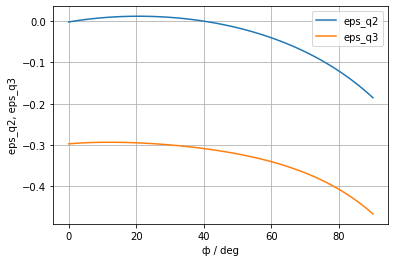

In [189]:
# Нахождение epsq2
def epsq2(angle):
    
    global delta
    
    eps_q2 = (wq2(angle + delta) - wq2(angle)) / radians(delta)
    
    return eps_q2

# Нахождение epsq3
def epsq3(angle):
    
    global delta
    
    eps_q3 = (wq3(angle + delta) - wq3(angle)) / radians(delta)
    
    return eps_q3

print('eps_q2 = ', epsq2(f))
print('eps_q3 = ', epsq3(f))
plt.plot(phi, [epsq2(i) for i in phi], label='eps_q2')
plt.plot( phi, [epsq3(i) for i in phi], label='eps_q3')
plt.ylabel('eps_q2, eps_q3')
plt.xlabel('ф / deg')
plt.grid()
plt.legend(loc='best')
plt.show()


### Нахождение линейных аналоговых скоростей

a_qs2x =  0.0409613014440637
a_qs2y =  -0.044358773222027824


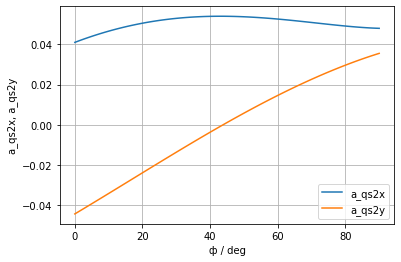

In [192]:
# Нахождение aqs2x
def aqs2x(angle):
    
    global delta
    
    a_qs2x = (Vqs2x(angle + delta) - Vqs2x(angle)) / radians(delta)
    
    return a_qs2x

# Нахождение aqs2y
def aqs2y(angle):
    
    global delta
    
    a_qs2y = (Vqs2y(angle + delta) - Vqs2y(angle)) / radians(delta)
    
    return a_qs2y

print('a_qs2x = ', aqs2x(f))
print('a_qs2y = ', aqs2y(f))
plt.plot(phi, [aqs2x(i) for i in phi], label='a_qs2x')
plt.plot( phi, [aqs2y(i) for i in phi], label='a_qs2y')
plt.ylabel('a_qs2x, a_qs2y')
plt.xlabel('ф / deg')
plt.grid()
plt.legend(loc='best')
plt.show()



In [1]:
print('Hello')

Hello
